In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/notebook/telecom_churn.csv")

In [4]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1781,2519-LBNQL,Male,1,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.35,6339.45,No
6746,8976-OQHGT,Female,0,Yes,Yes,4,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,56.50,235.1,Yes
1372,9793-WECQC,Male,0,No,No,23,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.30,2192.9,No


In [5]:
df.drop("customerID",axis=1,inplace=True)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
#replace space in TotalCharges column with null values permanent
df['TotalCharges'].replace(' ',np.nan,inplace=True)

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df['TotalCharges']=df['TotalCharges'].astype("float")

In [12]:
#fill all null values of TotalCharges column with mean of TotalCharges column
m=df['TotalCharges'].mean()
df['TotalCharges'].fillna(m,inplace=True)

In [13]:
#check data is imbalance or not
#we want to predict customer will left the service or not means predict
#the churn means here our target is churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
#separate all object type data and hold in df_cat
df_cat = df.select_dtypes("object")
#separate all numeric datatype type data and hold in df_num
df_num=df.select_dtypes(["float64","int64"])

In [16]:
#To converts object type data to number using LabelEncoder class
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [17]:
#to concatenate df_num,df_cat and hold in new data frame df_new
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [18]:
df_new.dtypes

SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
gender                int64
Partner               int64
Dependents            int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
Churn                 int64
dtype: object

In [19]:
#Select Input and output from dataset df
X=df_new.drop("Churn",axis=1) #input variable
Y=df_new["Churn"] #output means target

In [20]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
#Apply scaling
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [22]:
pd.Series(Y_train).value_counts() 

0    3589
1    1341
Name: Churn, dtype: int64

In [23]:
pd.Series(Y_test).value_counts() 

0    1585
1     528
Name: Churn, dtype: int64

In [24]:
#first time install  inbuilt package imblearn (for balanced the dataset)
#!pip install imblearn  

In [25]:
#Use randomoversampling
from imblearn.over_sampling import RandomOverSampler

In [26]:
#create object of  RandomOverSampler() class
ros = RandomOverSampler(random_state=1)

In [27]:
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [28]:
#Apply randomoversampling on 30% testing data
X_test_ros,Y_test_ros = ros.fit_resample(X_test,Y_test)

In [29]:
pd.Series(Y_test_ros).value_counts()

0    1585
1    1585
Name: Churn, dtype: int64

In [30]:
pd.Series(Y_train_ros).value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [31]:
X.shape

(7043, 19)

In [32]:
#create a neural network
import tensorflow as tf

model=tf.keras.Sequential([
            tf.keras.layers.Dense(64,activation='relu',
                        input_shape=(X.shape[1],)),#first hidden layer1
            tf.keras.layers.Dense(64,activation='relu'), #hidden layer2
            tf.keras.layers.Dense(1,activation='sigmoid') #output layer
])


In [33]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
#Train the model 
trained_model=model.fit(X_train_ros, Y_train_ros,batch_size=32, epochs=100,
                        validation_data=(X_test_ros, Y_test_ros))

Epoch 1/100
225/225 [==============================] - 2s 3ms/step - loss: 0.5234 - accuracy: 0.7410 - val_loss: 0.4859 - val_accuracy: 0.7694
Epoch 2/100
225/225 [==============================] - 1s 5ms/step - loss: 0.4817 - accuracy: 0.7650 - val_loss: 0.4826 - val_accuracy: 0.7685
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4710 - accuracy: 0.7717 - val_loss: 0.4812 - val_accuracy: 0.7703
Epoch 4/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4638 - accuracy: 0.7756 - val_loss: 0.4768 - val_accuracy: 0.7785
Epoch 5/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4552 - accuracy: 0.7788 - val_loss: 0.4836 - val_accuracy: 0.7678
Epoch 6/100
225/225 [==============================] - 1s 5ms/step - loss: 0.4484 - accuracy: 0.7797 - val_loss: 0.4887 - val_accuracy: 0.7609
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.4409 - accuracy: 0.7892 - val_loss: 0.4912 - val_accuracy: 0.7603

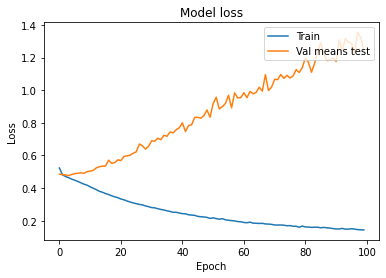

In [35]:
#visualise training error and testing error 
plt.plot(trained_model.history['loss']) #training's loss means error
plt.plot(trained_model.history['val_loss']) #testing's loss means error
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

In [38]:
#check loss and score on training time
model.evaluate(X_train_ros,Y_train_ros)

225/225 [==============================] - 1s 3ms/step - loss: 0.1353 - accuracy: 0.9465


[0.13533249497413635, 0.946503221988678]

In [39]:
#check loss and score on testing time
model.evaluate(X_test_ros,Y_test_ros)

100/100 [==============================] - 0s 3ms/step - loss: 1.2412 - accuracy: 0.6994


[1.2411643266677856, 0.6993690729141235]

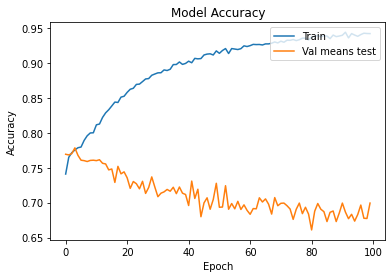

In [40]:
#visualise training score and testing score
plt.plot(trained_model.history['accuracy']) #training's loss means error
plt.plot(trained_model.history['val_accuracy']) #testing's loss means error
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

In [ ]:
#Here model is overfit  , to reduced overfit situation then apply Regularisation
#means to add external error on training time 
#Here Training score>testing score (model is overfit)


In [41]:
from keras import regularizers
model1=tf.keras.Sequential([
            tf.keras.layers.Dense(64,activation='relu',
                        kernel_regularizer=regularizers.l2(0.01),
                        input_shape=(X.shape[1],)),#first hidden layer1
            tf.keras.layers.Dense(64,activation='relu',
                kernel_regularizer=regularizers.l2(0.01)), #hidden layer2
            tf.keras.layers.Dense(1,activation='sigmoid',
                kernel_regularizer=regularizers.l2(0.01)
            ) #output layer
])

In [42]:
#compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
#Train the model 
trained_model1=model1.fit(X_train_ros, Y_train_ros,batch_size=32, epochs=100,
                        validation_data=(X_test_ros, Y_test_ros))

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 1.0338 - accuracy: 0.7322 - val_loss: 0.7112 - val_accuracy: 0.7707
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6442 - accuracy: 0.7577 - val_loss: 0.5735 - val_accuracy: 0.7757
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5727 - accuracy: 0.7632 - val_loss: 0.5412 - val_accuracy: 0.7735
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5532 - accuracy: 0.7640 - val_loss: 0.5318 - val_accuracy: 0.7773
Epoch 5/100
225/225 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7615 - val_loss: 0.5248 - val_accuracy: 0.7735
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5428 - accuracy: 0.7612 - val_loss: 0.5221 - val_accuracy: 0.7801
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5404 - accuracy: 0.7639 - val_loss: 0.5198 - val_accuracy: 0.7757

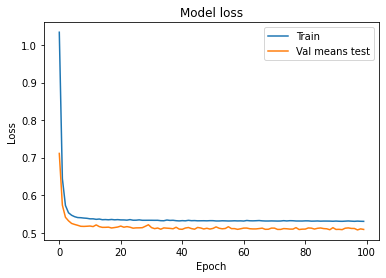

In [44]:
#visualise training error and testing error 
plt.plot(trained_model1.history['loss']) #training's loss means error
plt.plot(trained_model1.history['val_loss']) #testing's loss means error
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

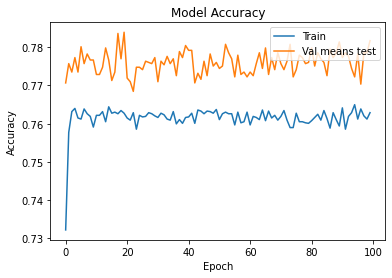

In [45]:
#visualise training score and testing score
plt.plot(trained_model1.history['accuracy']) #training's loss means error
plt.plot(trained_model1.history['val_accuracy']) #testing's loss means error
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

In [47]:
#check loss and score on training time
model1.evaluate(X_train_ros,Y_train_ros)

225/225 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7601


[0.5280681252479553, 0.7601003050804138]

In [48]:
#check loss and score on testing time
model1.evaluate(X_test_ros,Y_test_ros)

100/100 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7817


[0.5088663697242737, 0.7817034721374512]

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred=model1.predict(X_test_ros)
Y_pred=np.where(Y_pred>=0.5,1,0)
print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))



              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1585
           1       0.76      0.83      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1170  415]
 [ 277 1308]]
